In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("data/claims_train.csv")
test = pd.read_csv("data/claims_test.csv")

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

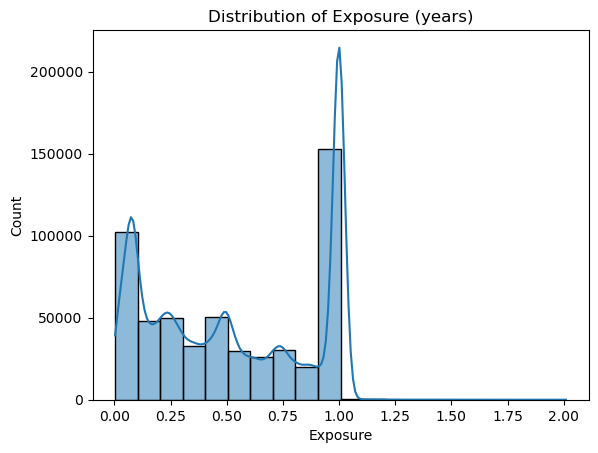

Exposure summary:
 count    542410.000000
mean          0.528840
std           0.364463
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64


In [4]:
# --- 1️⃣ Exposure distribution ---
sns.histplot(train['Exposure'], bins=20, kde=True)
plt.title("Distribution of Exposure (years)")
plt.xlabel("Exposure")
plt.ylabel("Count")
plt.show()

exposure_summary = train['Exposure'].describe()
print("Exposure summary:\n", exposure_summary)

In [6]:
# --- Share of policies above 1 year ---
n_total = len(train)
n_above1 = (train['Exposure'] > 1).sum()
share_above1 = n_above1 / n_total * 100
print(f"\nPolicies with Exposure > 1 year: {share_above1:.2f}% ({n_above1} of {n_total})")


Policies with Exposure > 1 year: 0.18% (994 of 542410)


In [8]:
# --- 3️ Claim rate per exposure ---
train['ClaimRate'] = train['ClaimNb'] / train['Exposure']

claim_rate_1yr = train.loc[train['Exposure'] <= 1, 'ClaimRate'].mean()
claim_rate_2yr = train.loc[train['Exposure'] > 1, 'ClaimRate'].mean()

print(f"\nAverage claim rate (≤1 year): {claim_rate_1yr:.4f}")
print(f"Average claim rate (>1 year):  {claim_rate_2yr:.4f}")


Average claim rate (≤1 year): 0.2616
Average claim rate (>1 year):  0.0384
